# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_GMM.ipynb``` or ```1b_CreateNoiseModel_Histogram.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or if the calibration data is not available.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
import unet.model
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://owncloud.mpi-cbg.de/index.php/s/31ZiGfcLmJXZk3X/download. Here we show the pipeline for Mouse skull nuclei dataset. Load the appropriate dataset at an appropriate path. For us, the path is data folder which exists at `../../../`. For Mouse skull nuclei, the data to be denoised is named ```example2_digital_offset300.tif```. 

### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [2]:
path='../../../data/Mouse skull nuclei/'
fileName='example2_digital_offset300.tif'
dataName='mouseskullnuclei' # This will be used to name the noise2void model

Run the cells below

In [3]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.

In [4]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

../../unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
../../unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)
/home/lalit/Desktop/01_Softwares/anaconda3/envs/ppn2vEnv/lib/python3.7/site-packages/torch/cuda/__init__.py:118: UserWarning: 
    Found GPU1 NVS 310 which is of cuda capability 2.1.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


Epoch 0 finished      
avg. loss: 0.15617868527770043+-(2SEM)0.0170146267767147      
Epoch 1 finished      
avg. loss: 0.13073008321225643+-(2SEM)0.012155910790470962      
Epoch 2 finished      
avg. loss: 0.1192662239074707+-(2SEM)0.016493355415442487      
Epoch 3 finished      
avg. loss: 0.11202582530677319+-(2SEM)0.013812051632724621      
Epoch 4 finished      
avg. loss: 0.12339361570775509+-(2SEM)0.015655448629748922      
Epoch 5 finished      
avg. loss: 0.1130489580333233+-(2SEM)0.012371316313858911      
Epoch 6 finished      
avg. loss: 0.10684906747192144+-(2SEM)0.012984165556163519      
Epoch 7 finished      
avg. loss: 0.1188681922852993+-(2SEM)0.012396478040341661      
Epoch 8 finished      
avg. loss: 0.11062669977545739+-(2SEM)0.01630744481452521      
Epoch 9 finished      
avg. loss: 0.10185093581676483+-(2SEM)0.011977283737358565      
Epoch 10 finished      
avg. loss: 0.1300123117864132+-(2SEM)0.018845398995724568      
Epoch 11 finished      
avg. loss: 0.1

Epoch 89 finished      
avg. loss: 0.10920301638543606+-(2SEM)0.011515327156370613      
Epoch 90 finished      
avg. loss: 0.10529038738459348+-(2SEM)0.0136769978230178      
Epoch 91 finished      
avg. loss: 0.09922887496650219+-(2SEM)0.011905075045449477      
Epoch 92 finished      
avg. loss: 0.11545039378106595+-(2SEM)0.010709966974253086      
Epoch 93 finished      
avg. loss: 0.10522130355238915+-(2SEM)0.013097893928455869      
Epoch 94 finished      
avg. loss: 0.10445032157003879+-(2SEM)0.015580016931802627      
Epoch 95 finished      
avg. loss: 0.11285140775144101+-(2SEM)0.01852010701142751      
Epoch 96 finished      
avg. loss: 0.10635268054902554+-(2SEM)0.01427724864946286      
Epoch 97 finished      
avg. loss: 0.11220659017562866+-(2SEM)0.01168969741291869      
Epoch 98 finished      
avg. loss: 0.11383585315197706+-(2SEM)0.0135694026782892      
Epoch 99 finished      
avg. loss: 0.10394614133983851+-(2SEM)0.011261965408102183      
Epoch    99: reducing learni

Epoch 176 finished      
avg. loss: 0.0988082367926836+-(2SEM)0.008228324755909929      
Epoch   176: reducing learning rate of group 0 to 6.1035e-08.
Epoch 177 finished      
avg. loss: 0.104218296892941+-(2SEM)0.012248470426674209      
Epoch 178 finished      
avg. loss: 0.11045261137187481+-(2SEM)0.009457749763354268      
Epoch 179 finished      
avg. loss: 0.10293811298906803+-(2SEM)0.01164821269161706      
Epoch 180 finished      
avg. loss: 0.12249657735228539+-(2SEM)0.015132317349666517      
Epoch 181 finished      
avg. loss: 0.11142482981085777+-(2SEM)0.012334195208602154      
Epoch 182 finished      
avg. loss: 0.10830876491963863+-(2SEM)0.01156179527777214      
Epoch 183 finished      
avg. loss: 0.10713730677962303+-(2SEM)0.01039898569784938      
Epoch 184 finished      
avg. loss: 0.10765357352793217+-(2SEM)0.011839054098495623      
Epoch 185 finished      
avg. loss: 0.10702204592525959+-(2SEM)0.008922950656375574      
Epoch 186 finished      
avg. loss: 0.114369

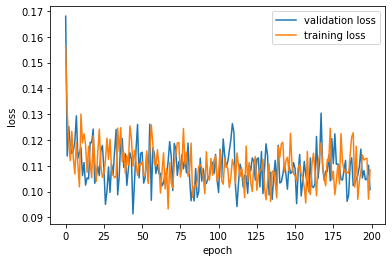

In [5]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()